In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)

data = pd.read_csv('/content/Students Performance Dataset.csv')
data.head(5)

Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   

    Department  Attendance (%)  Midterm_Score  Final_Score  Assignments_Avg  \
0  Mathematics           97.36          40.61        59.61            73.69   
1     Business           97.71          57.27        74.00            74.23   
2  Engineering           99.52          41.84        63.85            85.85   
3  Engineering           90.38          45.65        44.44            68.10   
4           CS           59.41          53.13        61.77            67.66   

   Quizzes_Avg  Participation_Score  Projects_Score  Total_Score Grade  \
0        53.17                 73.4           62.84      59.8865     F   
1        98.23                 88.0           98.23      81.9170     B   
2        50.00                  4.7           91.22      67.7170     D   
3        66.27                  4.2           55.48      51.6535     F   
4        83.98                 64.3           87.43      71.4030     C   

   Study_Hours_per_Week Extracurricular_Activities Internet_Access_at_Home  \
0                  10.3                        Yes                      No   
1                  27.1                         No                      No   
2                  12.4                        Yes                      No   
3                  25.5                         No                     Yes   
4                  13.3                        Yes                      No   

  Parent_Education_Level Family_Income_Level  Stress_Level (1-10)  \
0               Master's              Medium                    1   
1            High School                 Low                    4   
2            High School                 Low                    9   
3            High School                 Low                    8   
4               Master's              Medium                    6   

   Sleep_Hours_per_Night  
0                    5.9  
1                    4.3  
2                    6.1  
3                    4.9  
4                    4.5

In [ ]:
print(data.columns.tolist())

['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age', 'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']


In [ ]:
data.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email','Parent_Education_Level','Internet_Access_at_Home'], inplace=True)


In [ ]:
data.head(5)

Gender  Age   Department  Attendance (%)  Midterm_Score  Final_Score  \
0  Female   22  Mathematics           97.36          40.61        59.61   
1    Male   18     Business           97.71          57.27        74.00   
2    Male   24  Engineering           99.52          41.84        63.85   
3  Female   24  Engineering           90.38          45.65        44.44   
4  Female   23           CS           59.41          53.13        61.77   

   Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
0            73.69        53.17                 73.4           62.84   
1            74.23        98.23                 88.0           98.23   
2            85.85        50.00                  4.7           91.22   
3            68.10        66.27                  4.2           55.48   
4            67.66        83.98                 64.3           87.43   

   Total_Score Grade  Study_Hours_per_Week Extracurricular_Activities  \
0      59.8865     F                  10.3                        Yes   
1      81.9170     B                  27.1                         No   
2      67.7170     D                  12.4                        Yes   
3      51.6535     F                  25.5                         No   
4      71.4030     C                  13.3                        Yes   

  Family_Income_Level  Stress_Level (1-10)  Sleep_Hours_per_Night  
0              Medium                    1                    5.9  
1                 Low                    4                    4.3  
2                 Low                    9                    6.1  
3                 Low                    8                    4.9  
4              Medium                    6                    4.5

In [ ]:
data.isnull().sum()

Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

In [ ]:
data.shape

(5000, 17)

In [ ]:
data.describe()

Age  Attendance (%)  Midterm_Score  Final_Score  \
count  5000.000000     5000.000000    5000.000000  5000.000000   
mean     21.048400       75.356076      70.701924    69.546552   
std       1.989786       14.392716      17.436325    17.108996   
min      18.000000       50.010000      40.000000    40.010000   
25%      19.000000       62.945000      55.707500    54.697500   
50%      21.000000       75.670000      70.860000    69.485000   
75%      23.000000       87.862500      85.760000    83.922500   
max      24.000000      100.000000      99.990000    99.980000   

       Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
count      5000.000000  5000.000000          5000.000000      5000.00000   
mean         74.956320    74.836214            49.963720        74.78305   
std          14.404287    14.423848            28.989785        14.54243   
min          50.000000    50.000000             0.000000        50.00000   
25%          62.340000    62.357500            25.075000        61.97000   
50%          75.090000    74.905000            49.600000        74.54000   
75%          87.352500    87.292500            75.500000        87.63000   
max          99.990000    99.990000           100.000000       100.00000   

       Total_Score  Study_Hours_per_Week  Stress_Level (1-10)  \
count  5000.000000           5000.000000          5000.000000   
mean     71.652097             17.521140             5.507200   
std       7.230097              7.193035             2.886662   
min      50.602000              5.000000             1.000000   
25%      66.533875             11.500000             3.000000   
50%      71.696250             17.400000             6.000000   
75%      76.711625             23.700000             8.000000   
max      95.091500             30.000000            10.000000   

       Sleep_Hours_per_Night  
count            5000.000000  
mean                6.514420  
std                 1.446155  
min                 4.000000  
25%                 5.300000  
50%                 6.500000  
75%                 7.800000  
max                 9.000000

<Axes: xlabel='Total_Score'>

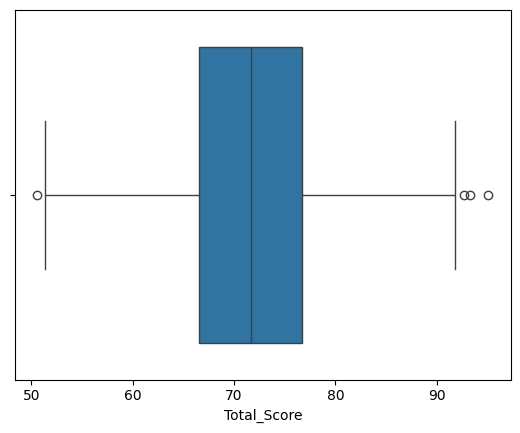

In [ ]:
sns.boxplot(x= data['Total_Score'])

In [ ]:
z_score = (data['Total_Score'] - data['Total_Score'].mean())/data['Total_Score'].std()
z_score>3
data['z_score'] = z_score
data[data['z_score']>3]

Gender  Age Department  Attendance (%)  Midterm_Score  Final_Score  \
1104  Female   20         CS           81.51          95.92        99.55   

      Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
1104            85.02        94.58                 99.4           95.45   

      Total_Score Grade  Study_Hours_per_Week Extracurricular_Activities  \
1104      95.0915     A                  14.4                        Yes   

     Family_Income_Level  Stress_Level (1-10)  Sleep_Hours_per_Night   z_score  
1104                 Low                    8                    5.4  3.241921

In [ ]:
# making new column
data['Result'] = data['Grade'].apply(lambda x: 'Fail' if x == 'F' else 'Pass')
data.head(3)

Gender  Age   Department  Attendance (%)  Midterm_Score  Final_Score  \
0  Female   22  Mathematics           97.36          40.61        59.61   
1    Male   18     Business           97.71          57.27        74.00   
2    Male   24  Engineering           99.52          41.84        63.85   

   Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
0            73.69        53.17                 73.4           62.84   
1            74.23        98.23                 88.0           98.23   
2            85.85        50.00                  4.7           91.22   

   Total_Score Grade  Study_Hours_per_Week Extracurricular_Activities  \
0      59.8865     F                  10.3                        Yes   
1      81.9170     B                  27.1                         No   
2      67.7170     D                  12.4                        Yes   

  Family_Income_Level  Stress_Level (1-10)  Sleep_Hours_per_Night   z_score  \
0              Medium                    1                    5.9 -1.627308   
1                 Low                    4                    4.3  1.419746   
2                 Low                    9                    6.1 -0.544266   

  Result  
0   Fail  
1   Pass  
2   Pass

In [ ]:
data.shape

(5000, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Department                  5000 non-null   object 
 3   Attendance (%)              5000 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             5000 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   object 
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Extracurricular_Activities'] = le.fit_transform(data['Extracurricular_Activities'])
data['Result'] = le.fit_transform(data['Result'])
data

Gender  Age   Department  Attendance (%)  Midterm_Score  Final_Score  \
0          0   22  Mathematics           97.36          40.61        59.61   
1          1   18     Business           97.71          57.27        74.00   
2          1   24  Engineering           99.52          41.84        63.85   
3          0   24  Engineering           90.38          45.65        44.44   
4          0   23           CS           59.41          53.13        61.77   
...      ...  ...          ...             ...            ...          ...   
4995       1   19           CS           96.09          45.86        45.63   
4996       1   19  Mathematics           96.30          78.67        47.42   
4997       0   24           CS           89.94          50.84        65.83   
4998       1   23  Engineering           99.09          55.44        57.45   
4999       0   21  Mathematics           90.33          93.29        88.42   

      Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
0               73.69        53.17                 73.4           62.84   
1               74.23        98.23                 88.0           98.23   
2               85.85        50.00                  4.7           91.22   
3               68.10        66.27                  4.2           55.48   
4               67.66        83.98                 64.3           87.43   
...               ...          ...                  ...             ...   
4995            74.13        81.53                  9.8           51.66   
4996            57.89        85.96                 47.8           52.33   
4997            84.69        82.27                  7.5           97.89   
4998            78.78        55.96                 62.9           84.74   
4999            87.06        65.22                 64.0           66.23   

      Total_Score Grade  Study_Hours_per_Week  Extracurricular_Activities  \
0         59.8865     F                  10.3                           1   
1         81.9170     B                  27.1                           0   
2         67.7170     D                  12.4                           1   
3         51.6535     F                  25.5                           0   
4         71.4030     C                  13.3                           1   
...           ...   ...                   ...                         ...   
4995      53.5470     F                   7.8                           0   
4996      59.0240     F                  24.2                           0   
4997      74.7560     C                   7.6                           0   
4998      68.6585     D                  14.5                           1   
4999      78.7485     C                  29.9                           1   

     Family_Income_Level  Stress_Level (1-10)  Sleep_Hours_per_Night  \
0                 Medium                    1                    5.9   
1                    Low                    4                    4.3   
2                    Low                    9                    6.1   
3                    Low                    8                    4.9   
4                 Medium                    6                    4.5   
...                  ...                  ...                    ...   
4995              Medium                   10                    4.5   
4996              Medium                    4                    7.2   
4997                High                    5                    6.6   
4998              Medium                   10                    5.9   
4999                High                    2                    5.3   

       z_score  Result  
0    -1.627308       0  
1     1.419746       1  
2    -0.544266       1  
3    -2.766020       0  
4    -0.034453       1  
...        ...     ...  
4995 -2.504129       0  
4996 -1.746601       0  
4997  0.429303       1  
4998 -0.414047       1  
4999  0.981509       1  

[5000 rows x 19 columns]

In [ ]:
data['Department'].unique()

array(['Mathematics', 'Business', 'Engineering', 'CS'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
department_encoded = ohe.fit_transform(data[['Department']])
department_encoded_df = pd.DataFrame(department_encoded.toarray(), columns=ohe.get_feature_names_out(['Department']))
data = pd.concat([data, department_encoded_df], axis=1)
data

Gender  Age   Department  Attendance (%)  Midterm_Score  Final_Score  \
0          0   22  Mathematics           97.36          40.61        59.61   
1          1   18     Business           97.71          57.27        74.00   
2          1   24  Engineering           99.52          41.84        63.85   
3          0   24  Engineering           90.38          45.65        44.44   
4          0   23           CS           59.41          53.13        61.77   
...      ...  ...          ...             ...            ...          ...   
4995       1   19           CS           96.09          45.86        45.63   
4996       1   19  Mathematics           96.30          78.67        47.42   
4997       0   24           CS           89.94          50.84        65.83   
4998       1   23  Engineering           99.09          55.44        57.45   
4999       0   21  Mathematics           90.33          93.29        88.42   

      Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
0               73.69        53.17                 73.4           62.84   
1               74.23        98.23                 88.0           98.23   
2               85.85        50.00                  4.7           91.22   
3               68.10        66.27                  4.2           55.48   
4               67.66        83.98                 64.3           87.43   
...               ...          ...                  ...             ...   
4995            74.13        81.53                  9.8           51.66   
4996            57.89        85.96                 47.8           52.33   
4997            84.69        82.27                  7.5           97.89   
4998            78.78        55.96                 62.9           84.74   
4999            87.06        65.22                 64.0           66.23   

      Total_Score Grade  Study_Hours_per_Week  Extracurricular_Activities  \
0         59.8865     F                  10.3                           1   
1         81.9170     B                  27.1                           0   
2         67.7170     D                  12.4                           1   
3         51.6535     F                  25.5                           0   
4         71.4030     C                  13.3                           1   
...           ...   ...                   ...                         ...   
4995      53.5470     F                   7.8                           0   
4996      59.0240     F                  24.2                           0   
4997      74.7560     C                   7.6                           0   
4998      68.6585     D                  14.5                           1   
4999      78.7485     C                  29.9                           1   

     Family_Income_Level  Stress_Level (1-10)  Sleep_Hours_per_Night  \
0                 Medium                    1                    5.9   
1                    Low                    4                    4.3   
2                    Low                    9                    6.1   
3                    Low                    8                    4.9   
4                 Medium                    6                    4.5   
...                  ...                  ...                    ...   
4995              Medium                   10                    4.5   
4996              Medium                    4                    7.2   
4997                High                    5                    6.6   
4998              Medium                   10                    5.9   
4999                High                    2                    5.3   

       z_score  Result  Department_Business  Department_CS  \
0    -1.627308       0                  0.0            0.0   
1     1.419746       1                  1.0            0.0   
2    -0.544266       1                  0.0            0.0   
3    -2.766020       0                  0.0            0.0   
4    -0.034453       1                  0.0            1.0   
...   

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
data[['Family_Income_Level']] = encoder.fit_transform(data[['Family_Income_Level']])


In [ ]:
data.drop(['Grade','Department'], axis=1, inplace=True)


In [ ]:
data

Gender  Age  Attendance (%)  Midterm_Score  Final_Score  \
0          0   22           97.36          40.61        59.61   
1          1   18           97.71          57.27        74.00   
2          1   24           99.52          41.84        63.85   
3          0   24           90.38          45.65        44.44   
4          0   23           59.41          53.13        61.77   
...      ...  ...             ...            ...          ...   
4995       1   19           96.09          45.86        45.63   
4996       1   19           96.30          78.67        47.42   
4997       0   24           89.94          50.84        65.83   
4998       1   23           99.09          55.44        57.45   
4999       0   21           90.33          93.29        88.42   

      Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
0               73.69        53.17                 73.4           62.84   
1               74.23        98.23                 88.0           98.23   
2               85.85        50.00                  4.7           91.22   
3               68.10        66.27                  4.2           55.48   
4               67.66        83.98                 64.3           87.43   
...               ...          ...                  ...             ...   
4995            74.13        81.53                  9.8           51.66   
4996            57.89        85.96                 47.8           52.33   
4997            84.69        82.27                  7.5           97.89   
4998            78.78        55.96                 62.9           84.74   
4999            87.06        65.22                 64.0           66.23   

      Total_Score  Study_Hours_per_Week  Extracurricular_Activities  \
0         59.8865                  10.3                           1   
1         81.9170                  27.1                           0   
2         67.7170                  12.4                           1   
3         51.6535                  25.5                           0   
4         71.4030                  13.3                           1   
...           ...                   ...                         ...   
4995      53.5470                   7.8                           0   
4996      59.0240                  24.2                           0   
4997      74.7560                   7.6                           0   
4998      68.6585                  14.5                           1   
4999      78.7485                  29.9                           1   

      Family_Income_Level  Stress_Level (1-10)  Sleep_Hours_per_Night  \
0                     1.0                    1                    5.9   
1                     0.0                    4                    4.3   
2                     0.0                    9                    6.1   
3                     0.0                    8                    4.9   
4                     1.0                    6                    4.5   
...                   ...                  ...                    ...   
4995                  1.0                   10                    4.5   
4996                  1.0                    4                    7.2   
4997                  2.0                    5                    6.6   
4998                  1.0                   10                    5.9   
4999                  2.0                    2                    5.3   

       z_score  Result  Department_Business  Department_CS  \
0    -1.627308       0                  0.0            0.0   
1     1.419746       1                  1.0            0.0   
2    -0.544266       1                  0.0            0.0   
3    -2.766020       0                  0.0            0.0   
4    -0.034453       1                  0.0            1.0   
...        ...     ...                  ...            ...   
4995 -2.504129       0                  0.0            1.0   
4996 -1.746601       0                  0.0            0.0   
4997  0.429303       1              

In [ ]:
X = data.drop(['Result'], axis=1)
y = data['Result']



In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((4000, 20), (1000, 20))

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

# Compare
print("Logistic Regression Accuracy:", lr_acc)
print("Decision Tree Accuracy:", dt_acc)


Logistic Regression Accuracy: 0.991
Decision Tree Accuracy: 1.0


In [ ]:
cm = confusion_matrix(y_test, lr_pred)
print(cm)

[[ 47   6]
 [  3 944]]


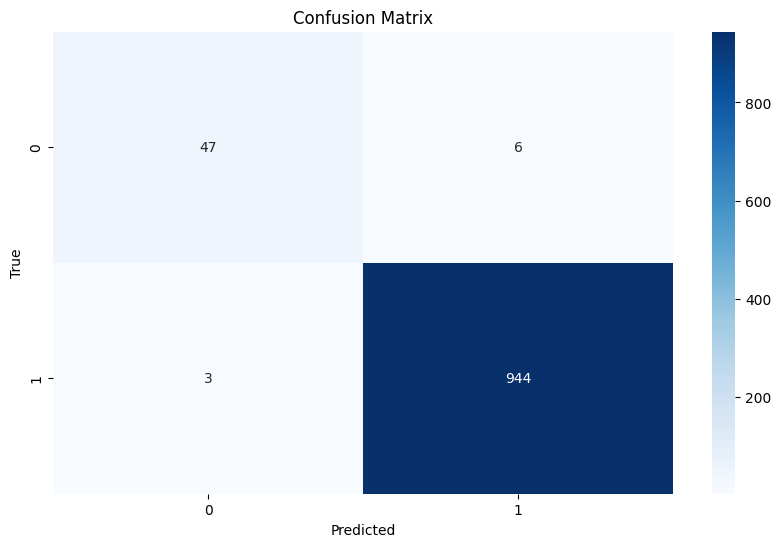

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
cm_dt = confusion_matrix(y_test, dt_pred)
print(cm_dt)

[[ 53   0]
 [  0 947]]


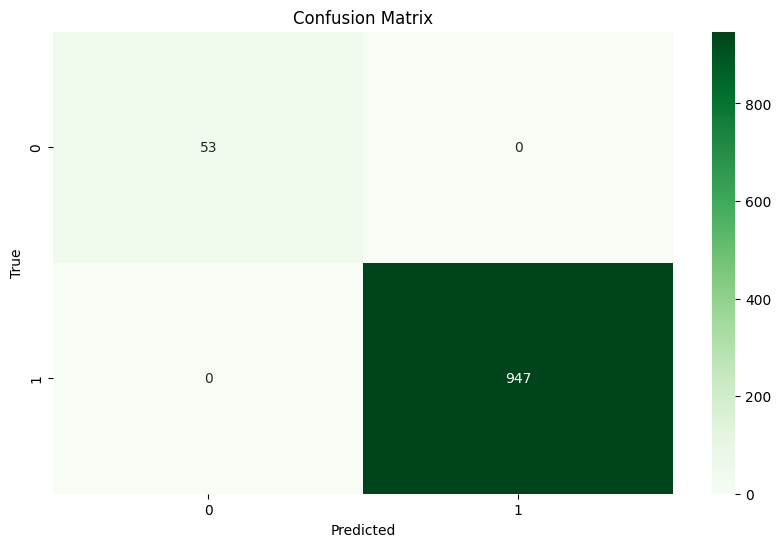

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
#

In [ ]:
cr = classification_report(y_test, lr_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        53
           1       0.99      1.00      1.00       947

    accuracy                           0.99      1000
   macro avg       0.97      0.94      0.95      1000
weighted avg       0.99      0.99      0.99      1000



In [ ]:
cr_dt = classification_report(y_test, dt_pred)
print(cr_dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00       947

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



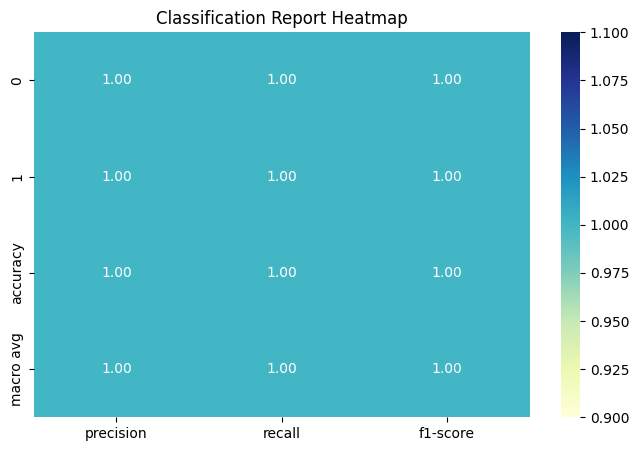

In [ ]:
report = classification_report(y_test, dt_pred, output_dict=True)
report_data = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(report_data.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()

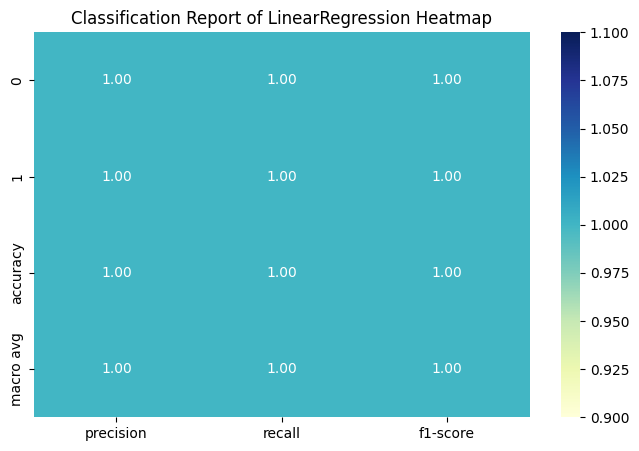

In [ ]:
reports = classification_report(y_test, lr_pred, output_dict=True)
reports_data = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(reports_data.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report of LinearRegression Heatmap")
plt.show()

In [ ]:
# Example feature vector (must match training feature order)
input_values = [[1, 0, 1, 34, 78, 9, 3, 4, 70, 5, 2, 1, 1, 0, 0, 0.0, 0.0, 0.0, 1.0, 0.0]]  # shape = (1, n_features)

prediction = lr.predict(input_values)
print("Prediction:", "Pass " if prediction[0] == 1 else "Fail ")

Prediction: Pass 


In [ ]:
input_values = [[1, 0, 1, 34, 78, 9, 3, 4, 70, 5, 2, 1, 1, 0, 0, 0.0, 0.0, 0.0, 1.0, 0.0]]  # shape = (1, n_features)

prediction = dt.predict(input_values)
print("Prediction:", "Pass " if prediction[0] == 1 else "Fail ")

Prediction: Fail 


In [ ]:
proba = lr.predict_proba(input_values)
print("Probability of Pass:", proba[0][1])


Probability of Pass: 0.999918778918379


In [ ]:
proba = dt.predict_proba(input_values)
print("Probability of Pass:", proba[0][1])


Probability of Pass: 0.0


***Analysis shows that features like attendance, study hours, and assignment completion have a direct positive impact on student performance. Additionaly, family income level and extracircular activities showed meaningful influence, whereas department and gender had a mild effects depending on the dataset balance. As shown above Logistic Regression and Decision tree, they both models give different results on the same input - each model interprets the data in its own way.***

In [ ]:
import pickle

# Save Logistic Regression model
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

# Save Decision Tree model
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt, f)

# Save label encoder (for Gender & Extra Curricular)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

# Save one hot encoder (for Department)
with open('onehot_encoder.pkl', 'wb') as f:
    pickle.dump(ohe, f)

# Save ordinal encoder (for Family Income Level)
with open('ordinal_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

# Save feature columns (to use during prediction)
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)
